In [1]:
# Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier


In [3]:
# Source data : Reddit

In [4]:
data_r = pd.read_csv("custom_data_for_risk_model.csv")
data_r.head(5)

,Unnamed: 0,created_utc,author,score,num_comments,text,original_text,year,month,contain_sg,contain_covid,contain_mental_health,Relevancy,sentiment score,sentiment_class
0,0,2021-05-22,MicrotechAnalysis,117,36,spore psychotic disorder say study nan,"About 71,600 in S'pore have psychotic disorder...",2021,5,True,False,True,False,-0.4019,Negative
1,1,2021-05-19,summerfellxx,8,6,anyone know get tested adult auditory processi...,Anyone know where to get tested as an Adult fo...,2021,5,True,False,True,False,-0.8338,Very Negative
2,2,2021-01-07,DrCalFun,202,90,she even time grieve donor ask mum refund boy ...,'She didn't even have time to grieve': Some do...,2021,1,True,False,True,False,-0.6486,Very Negative
3,3,2021-03-29,ElijahThor00,5,6,help adjustment disorder people say half war r...,Help for adjustment disorder People say half t...,2021,3,True,False,True,False,-0.5994,Very Negative
4,4,2021-01-19,kanicroquette,42,9,get assessed eating disorder might eating diso...,Where to get assessed for eating disorders? I ...,2021,1,True,False,True,False,-0.7003,Very Negative


In [5]:
# Dropping Columns

In [6]:
data_r = data_r.drop(["Unnamed: 0","original_text", "score","contain_sg"], axis = 1)

In [7]:
data_r.tail(5)

,created_utc,author,num_comments,text,year,month,contain_covid,contain_mental_health,Relevancy,sentiment score,sentiment_class
18312,2019-03-13,wintersoju,8,influenza vaccine different brand vaccine avai...,2019,3,True,False,False,0.4939,Positive
18313,2019-03-06,dailyfield,40,parliament free optin cervical cancer vaccine ...,2019,3,True,False,False,-0.2732,Negative
18314,2019-02-10,yummydubu,20,lady hpv vaccination yn experience cost medisa...,2019,2,True,False,False,0.7845,Very Positive
18315,2019-05-08,Jammy_buttons2,33,sec girl opt free cervical cancer vaccine khor...,2019,5,True,False,False,-0.2732,Negative
18316,2019-10-29,jasonrodriguez_DT,6,planning go back sg december polio vaccine req...,2019,10,True,False,False,0.5927,Positive


In [8]:
# Renaming Columns

In [9]:
data_r = data_r.rename({"created_utc":"date", "author":"username","num_comments":"nreplies","sentiment score":"sentiment_score","Relevancy":"relevance"}, axis=1)

In [10]:
data_r.tail(5)

,date,username,nreplies,text,year,month,contain_covid,contain_mental_health,relevance,sentiment_score,sentiment_class
18312,2019-03-13,wintersoju,8,influenza vaccine different brand vaccine avai...,2019,3,True,False,False,0.4939,Positive
18313,2019-03-06,dailyfield,40,parliament free optin cervical cancer vaccine ...,2019,3,True,False,False,-0.2732,Negative
18314,2019-02-10,yummydubu,20,lady hpv vaccination yn experience cost medisa...,2019,2,True,False,False,0.7845,Very Positive
18315,2019-05-08,Jammy_buttons2,33,sec girl opt free cervical cancer vaccine khor...,2019,5,True,False,False,-0.2732,Negative
18316,2019-10-29,jasonrodriguez_DT,6,planning go back sg december polio vaccine req...,2019,10,True,False,False,0.5927,Positive


In [11]:
data_r.shape

(18317, 11)

In [12]:
cols = list(data_r.columns.values)
cols

['date',
 'username',
 'nreplies',
 'text',
 'year',
 'month',
 'contain_covid',
 'contain_mental_health',
 'relevance',
 'sentiment_score',
 'sentiment_class']

In [14]:
# Rearranging the order of columns to merge with same column name

In [15]:
data_r = data_r[["date","username","nreplies","text","year","month","sentiment_score","sentiment_class","contain_mental_health",
"contain_covid","relevance"]]

In [16]:
data_r.head()

,date,username,nreplies,text,year,month,sentiment_score,sentiment_class,contain_mental_health,contain_covid,relevance
0,2021-05-22,MicrotechAnalysis,36,spore psychotic disorder say study nan,2021,5,-0.4019,Negative,True,False,False
1,2021-05-19,summerfellxx,6,anyone know get tested adult auditory processi...,2021,5,-0.8338,Very Negative,True,False,False
2,2021-01-07,DrCalFun,90,she even time grieve donor ask mum refund boy ...,2021,1,-0.6486,Very Negative,True,False,False
3,2021-03-29,ElijahThor00,6,help adjustment disorder people say half war r...,2021,3,-0.5994,Very Negative,True,False,False
4,2021-01-19,kanicroquette,9,get assessed eating disorder might eating diso...,2021,1,-0.7003,Very Negative,True,False,False


In [17]:
percent_missing = data_r.isnull().sum() * 100 / len(data_r)
missing_value_df = pd.DataFrame({'column_name': data_r.columns,
                                 'percent_missing': percent_missing})

In [18]:
missing_value_df

,column_name,percent_missing
date,date,0.0
username,username,0.0
nreplies,nreplies,0.0
text,text,0.0
year,year,0.0
month,month,0.0
sentiment_score,sentiment_score,0.0
sentiment_class,sentiment_class,0.0
contain_mental_health,contain_mental_health,0.0
contain_covid,contain_covid,0.0


In [19]:
data_r.isnull().sum()

date                     0
username                 0
nreplies                 0
text                     0
year                     0
month                    0
sentiment_score          0
sentiment_class          0
contain_mental_health    0
contain_covid            0
relevance                0
dtype: int64

In [20]:
data_r = data_r.reset_index()

In [21]:
# Feature Extraction

In [23]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

count = CountVectorizer(binary = True)
bow = count.fit_transform(data_r['sentiment_class'].values)

data_1 = pd.DataFrame(bow.toarray(), columns = count.get_feature_names())
data_1

,negative,neutral,positive,very
0,1,0,0,0
1,1,0,0,1
2,1,0,0,1
3,1,0,0,1
4,1,0,0,1
...,...,...,...,...
18312,0,0,1,0
18313,1,0,0,0
18314,0,0,1,1
18315,1,0,0,0


In [24]:
data_1 = data_1.reset_index()
data_1

,index,negative,neutral,positive,very
0,0,1,0,0,0
1,1,1,0,0,1
2,2,1,0,0,1
3,3,1,0,0,1
4,4,1,0,0,1
...,...,...,...,...,...
18312,18312,0,0,1,0
18313,18313,1,0,0,0
18314,18314,0,0,1,1
18315,18315,1,0,0,0


In [25]:
data = pd.concat([data_r,data_1], axis=1)
data.head()

,index,date,username,nreplies,text,year,month,sentiment_score,sentiment_class,contain_mental_health,contain_covid,relevance,index,negative,neutral,positive,very
0,0,2021-05-22,MicrotechAnalysis,36,spore psychotic disorder say study nan,2021,5,-0.4019,Negative,True,False,False,0,1,0,0,0
1,1,2021-05-19,summerfellxx,6,anyone know get tested adult auditory processi...,2021,5,-0.8338,Very Negative,True,False,False,1,1,0,0,1
2,2,2021-01-07,DrCalFun,90,she even time grieve donor ask mum refund boy ...,2021,1,-0.6486,Very Negative,True,False,False,2,1,0,0,1
3,3,2021-03-29,ElijahThor00,6,help adjustment disorder people say half war r...,2021,3,-0.5994,Very Negative,True,False,False,3,1,0,0,1
4,4,2021-01-19,kanicroquette,9,get assessed eating disorder might eating diso...,2021,1,-0.7003,Very Negative,True,False,False,4,1,0,0,1


In [26]:
data = data.drop(["text","nreplies"], axis = 1)

In [27]:
# Multilabel Encoding

In [28]:
categorical_columns = list(data.loc[:, data.dtypes =="object"].columns)
categorical_columns

['date', 'username', 'sentiment_class']

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def MultiLabelEncoder(columnlist,dataframe):
    for i in columnlist:
        #print(i)
        labelencoder_X=LabelEncoder()
        dataframe[i]=labelencoder_X.fit_transform(dataframe[i])

MultiLabelEncoder(categorical_columns, data)

In [30]:
data.head()

,index,date,username,year,month,sentiment_score,sentiment_class,contain_mental_health,contain_covid,relevance,index,negative,neutral,positive,very
0,0,1018,1862,2021,5,-0.4019,0,True,False,False,0,1,0,0,0
1,1,1015,7975,2021,5,-0.8338,3,True,False,False,1,1,0,0,1
2,2,883,813,2021,1,-0.6486,3,True,False,False,2,1,0,0,1
3,3,964,890,2021,3,-0.5994,3,True,False,False,3,1,0,0,1
4,4,895,5907,2021,1,-0.7003,3,True,False,False,4,1,0,0,1


In [31]:
# Target Variable

In [32]:
data["has_mental_impact"] = np.where((data['negative']== 1) & (data['relevance']==1) ,1,0)

In [33]:
data.head()

,index,date,username,year,month,sentiment_score,sentiment_class,contain_mental_health,contain_covid,relevance,index,negative,neutral,positive,very,has_mental_impact
0,0,1018,1862,2021,5,-0.4019,0,True,False,False,0,1,0,0,0,0
1,1,1015,7975,2021,5,-0.8338,3,True,False,False,1,1,0,0,1,0
2,2,883,813,2021,1,-0.6486,3,True,False,False,2,1,0,0,1,0
3,3,964,890,2021,3,-0.5994,3,True,False,False,3,1,0,0,1,0
4,4,895,5907,2021,1,-0.7003,3,True,False,False,4,1,0,0,1,0


In [34]:
data["has_mental_impact"].value_counts()

0    17319
1      998
Name: has_mental_impact, dtype: int64

In [35]:
data.isnull().sum()

index                    0
date                     0
username                 0
year                     0
month                    0
sentiment_score          0
sentiment_class          0
contain_mental_health    0
contain_covid            0
relevance                0
index                    0
negative                 0
neutral                  0
positive                 0
very                     0
has_mental_impact        0
dtype: int64

In [36]:
data["username"].count()

18317

In [37]:
data = data.drop("index", axis =1)

In [38]:
# Train_Test Split

In [39]:
y = data["has_mental_impact"]
X = data.drop("has_mental_impact", axis = 1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state  = 42)

In [41]:
X_train.head(5)

,date,username,year,month,sentiment_score,sentiment_class,contain_mental_health,contain_covid,relevance,negative,neutral,positive,very
10547,1015,5632,2021,5,-0.9509,3,False,False,False,1,0,0,1
14313,613,4091,2020,4,-0.5994,3,True,True,True,1,0,0,1
4822,810,2046,2020,10,-0.4215,0,True,False,False,1,0,0,0
4907,802,5780,2020,10,-0.8720,3,True,False,False,1,0,0,1
13028,44,1868,2017,9,-0.8225,3,True,True,True,1,0,0,1


In [42]:
y_train.head()

10547    0
14313    1
4822     0
4907     0
13028    1
Name: has_mental_impact, dtype: int32

In [43]:
X_test.head()

,date,username,year,month,sentiment_score,sentiment_class,contain_mental_health,contain_covid,relevance,negative,neutral,positive,very
8242,1014,2522,2021,5,0.0000,1,False,True,False,0,1,0,0
6934,918,3330,2021,2,-0.0258,1,False,False,False,0,1,0,0
7449,742,7930,2020,8,0.0000,1,False,False,False,0,1,0,0
14971,617,6282,2020,4,0.3182,2,False,False,False,0,0,1,0
15137,608,3823,2020,4,-0.2732,0,False,False,False,1,0,0,0


In [44]:
y_test.head()

8242     0
6934     0
7449     0
14971    0
15137    0
Name: has_mental_impact, dtype: int32

In [45]:
# Standardization of the data

In [46]:
scale = StandardScaler()
features = X_train.columns
X_train = scale.fit_transform(X_train[features])

X_test = scale.transform(X_test)

In [47]:
#Logistic Regression Classifier

In [48]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [49]:
#Checking Accuracy Score

In [50]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4344    0]
 [   0  236]]


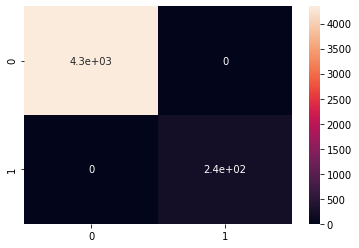

In [52]:
sns.heatmap(confusion_matrix,annot=True)

In [53]:
#Checking Classification Report

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4344
           1       1.00      1.00      1.00       236

    accuracy                           1.00      4580
   macro avg       1.00      1.00      1.00      4580
weighted avg       1.00      1.00      1.00      4580



In [55]:
# ROC auc_score & curve

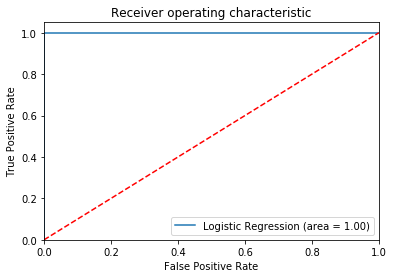

In [56]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()